# Logistic Regression Model


In [2]:
#import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns

Get datasets from kaggle.Here, I am using a dataset "Logistic regression To predict heart disease".


In [3]:
df=pd.read_csv('heart.csv')

In [5]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [7]:
#checking for null values
df.isnull()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4234,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4235,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4236,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


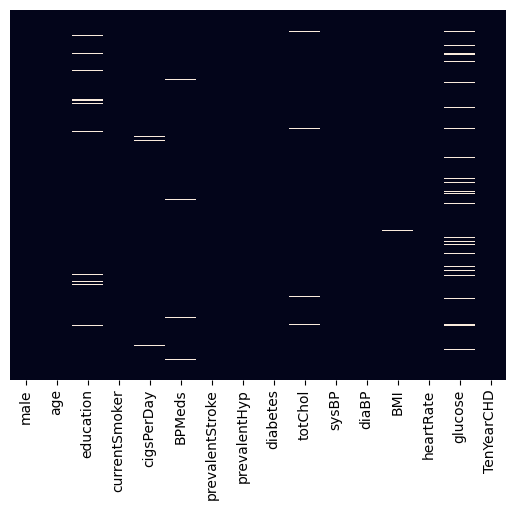

In [8]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False);

C:\Users\blaks\Downloads\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


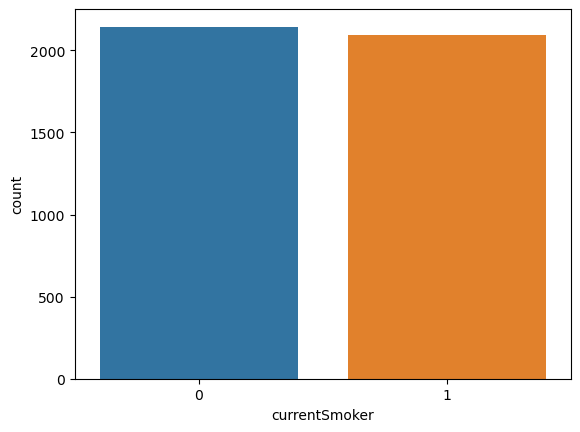

In [9]:
sns.countplot('currentSmoker',data=df);

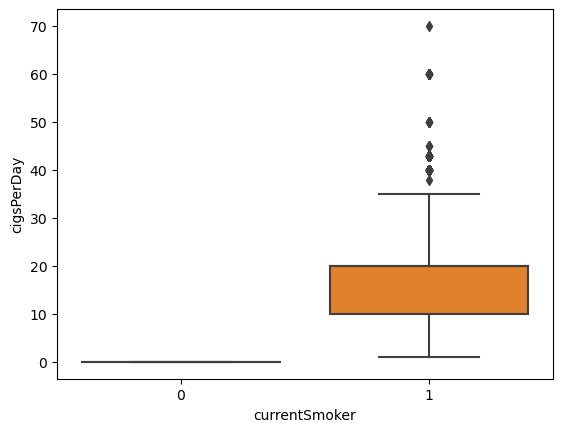

In [17]:
sns.boxplot(x='currentSmoker',y='cigsPerDay',data=df);

In [10]:
def impute_cigs(cols):
    cigsPerDay=cols[0]
    currentSmoker=cols[1]
    if pd.isnull(cigsPerDay):
    
        if currentSmoker==0:
            return 0
        else:
            return 20
    return cigsPerDay

In [11]:
df['cigsPerDay']=df[['cigsPerDay','currentSmoker']].apply(impute_cigs,axis=1)

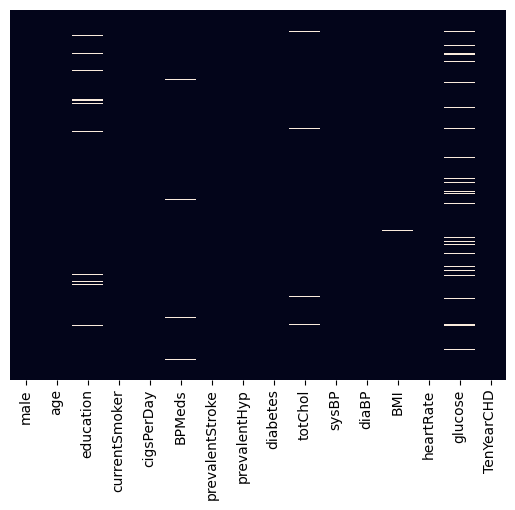

In [18]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False);

In [19]:
df['prevalentHyp'].describe()

count    4238.000000
mean        0.310524
std         0.462763
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: prevalentHyp, dtype: float64

In [20]:
def impute_BPMeds(cols):
    BPMeds=cols[0]
    prevalentHyp=cols[1]
    if pd.isnull(BPMeds):
        if prevalentHyp==0:
            return 0
        else:
            return 1
    return BPMeds

In [21]:
df['BPMeds']=df[['BPMeds','prevalentHyp']].apply(impute_BPMeds,axis=1)

<AxesSubplot:>

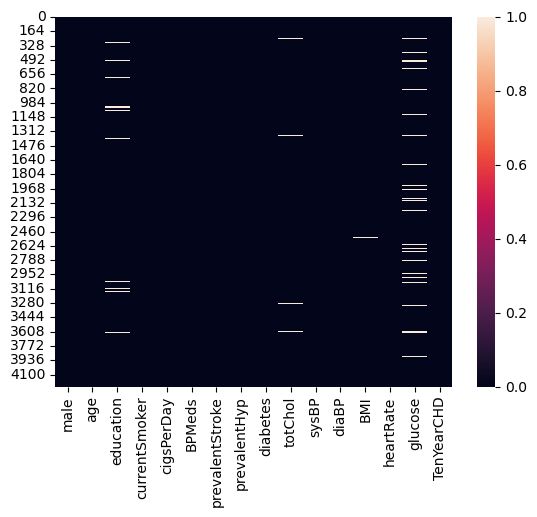

In [22]:
sns.heatmap(df.isnull(),data=df)

In [23]:
df['BPMeds'].value_counts()

0.0    4092
1.0     146
Name: BPMeds, dtype: int64

In [24]:
df['totChol'].describe()

count    4188.000000
mean      236.721585
std        44.590334
min       107.000000
25%       206.000000
50%       234.000000
75%       263.000000
max       696.000000
Name: totChol, dtype: float64

In [25]:
df['totChol']=df['totChol'].fillna(234)

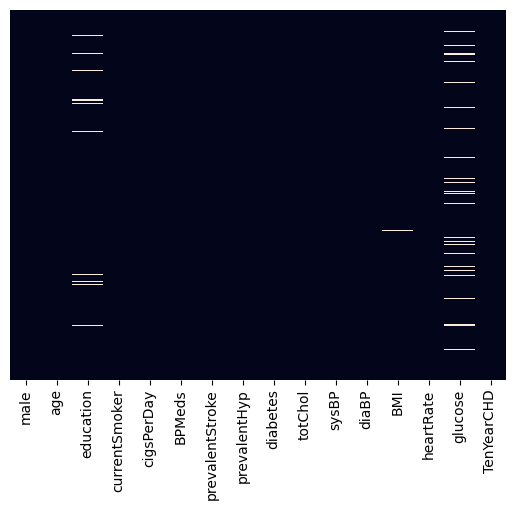

In [26]:
sns.heatmap(df.isnull(),data=df,yticklabels=False,cbar=False);

In [27]:
df['BMI'].describe()

count    4219.000000
mean       25.802008
std         4.080111
min        15.540000
25%        23.070000
50%        25.400000
75%        28.040000
max        56.800000
Name: BMI, dtype: float64

In [28]:
df['BMI']=df['BMI'].fillna(25.4)

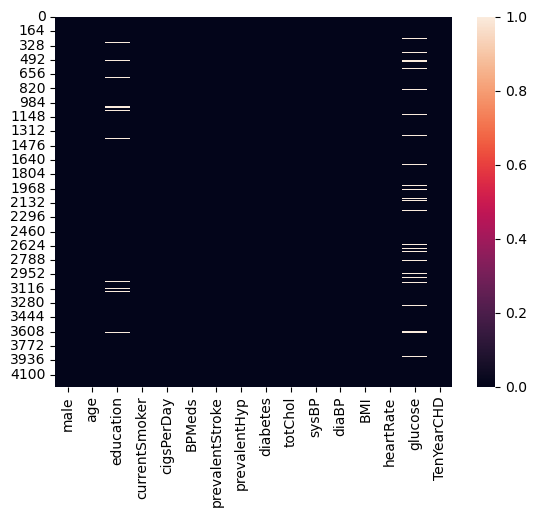

In [29]:
sns.heatmap(df.isnull(),data=df);

In [30]:
df['glucose'].describe()

count    3850.000000
mean       81.966753
std        23.959998
min        40.000000
25%        71.000000
50%        78.000000
75%        87.000000
max       394.000000
Name: glucose, dtype: float64

In [31]:
df['glucose']=df['glucose'].fillna(78)

In [32]:
df=df.drop(columns='education')

In [33]:
df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [34]:
import numpy as np

# Replace infinite values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill or drop NaN values
df.fillna(0, inplace=True)  # Replace NaNs with 0 (or use df.dropna())

# Convert float columns to int
df = df.astype({col: 'int64' for col in df.select_dtypes('float64').columns})

# Train data and Test data


In [35]:
x=df.drop(columns='TenYearCHD')

In [36]:
x.shape

(4238, 14)

In [37]:
y=df['TenYearCHD']

In [38]:
y.shape

(4238,)

In [39]:
X_train,X_test,y_train,y_test=train_test_split(
    x,y,test_size=0.2,random_state=45
)

In [40]:
X_train.shape

(3390, 14)

In [41]:
X_test.shape

(848, 14)

In [42]:
y_train.shape

(3390,)

In [43]:
y_test.shape

(848,)

# Building BaseLine model


In [44]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_train, y_train)
baseline_acc = dummy.score(X_test, y_test)
print("Baseline Accuracy:", baseline_acc)


Baseline Accuracy: 0.8408018867924528


# Building Logistic Regression model


In [45]:
#Instantiate the model
model=LogisticRegression(max_iter=500)

In [46]:
#fit the data to the model
model.fit(X_train,y_train)

C:\Users\blaks\Downloads\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500)

In [47]:
#predict the X_test data
pred=model.predict(X_test)

In [49]:
#evaluate the model prediction using accuracy metrics
accuracy=accuracy_score(y_test,pred)

In [51]:
print("The Accuracy of this model is:",accuracy)

The Accuracy of this model is: 0.8431603773584906
